In [1]:
from AMS_BP.configio.configmodels import CellParameters

"""
cell_space = [[x_min, x_max], [y_min, y_max]] #um
cell_axial_radius = 1 #um from -1 to 1.
"""
cellp = CellParameters(cell_space=[[4, 7], [3, 9]], cell_axial_radius=0.5)

print(cellp)

cell_space=array([[4., 7.],
       [3., 9.]]) cell_axial_radius=0.5


In [2]:
from AMS_BP.configio.convertconfig import make_cell

rcell = make_cell(cellp)
print(
    rcell
)  # z=0 is always the origin. origin + dimensions = x_max, y_max, z_range. z_range = 2 * | cell_axial_radius |

RectangularCell(origin=array([4., 3.]), dimensions=array([3., 6., 1.]))


In [3]:
from AMS_BP.configio.configmodels import MoleculeParameters

num_molecules = [10000]  
track_type = [
    "fbm",
]  
allow_transition_probability = [
    False,
]  
diffusion_coefficient = [
    [
        0.04,
        0.04,
    ],
] 
diffusion_track_amount = [
    [
        0.5,
        0.5,
    ],

]  
hurst_exponent = [
    [
        0.5,
        0.5,
    ],

]  
hurst_track_amount = [
    [
        0.5,
        0.5,
    ],

]  

diffusion_transition_matrix = [
    [
        [
            0.992,
            0.008,
        ],
        [
            0.0273,
            0.9727,
        ],
    ],

]  
hurst_transition_matrix = [
    [
        [
            0.992,
            0.008,
        ],
        [
            0.0273,
            0.9727,
        ],
    ],

]  
transition_matrix_time_step = [
    20,
]  


In [4]:
# combine it into one data structure
molecule_parameters = MoleculeParameters(
    num_molecules=num_molecules,
    track_type=track_type,
    diffusion_coefficient=diffusion_coefficient,
    state_probability_diffusion=diffusion_track_amount,
    hurst_exponent=hurst_exponent,
    state_probability_hurst=hurst_track_amount,
    allow_transition_probability=allow_transition_probability,
    transition_matrix_time_step=transition_matrix_time_step,
    diffusion_transition_matrix=diffusion_transition_matrix,
    hurst_transition_matrix=hurst_transition_matrix,
)
print(molecule_parameters)

num_molecules=[10000] track_type=['fbm'] diffusion_coefficient=array([[0.04, 0.04]]) hurst_exponent=array([[0.5, 0.5]]) allow_transition_probability=[False] transition_matrix_time_step=[20] diffusion_transition_matrix=array([[[0.992 , 0.008 ],
        [0.0273, 0.9727]]]) hurst_transition_matrix=array([[[0.992 , 0.008 ],
        [0.0273, 0.9727]]]) state_probability_diffusion=array([[0.5, 0.5]]) state_probability_hurst=array([[0.5, 0.5]])


In [5]:
sample_plane_dim = [
    10,
    10,
]  # in um. Describes the size of the plane on which the sample is placed.
cycle_count = 100  # Number of cycles to run the simulation for. (this would be the # of frames in a movies if a time series)
# cycle_count is 1 for each exposure_time + interval_time in the simulation.
exposure_time = 20  # in ms
interval_time = 0  # in ms
oversample_motion_time = 10  # this is the smallest time step in the simulation for the motion of the molecules. Both the exposure_time and interval_time need to be equal to or larger than this, or be 0.

from AMS_BP.configio.convertconfig import GlobalParameters

globalp = GlobalParameters(
    sample_plane_dim=sample_plane_dim,
    cycle_count=cycle_count,
    exposure_time=exposure_time,
    interval_time=interval_time,
    oversample_motion_time=oversample_motion_time,
)
print(globalp)

sample_plane_dim=array([10., 10.]) cycle_count=100 exposure_time=20 interval_time=0 oversample_motion_time=10


In [6]:
initial_centers = [
    [

        [
            5,
            7,
            -0.15,
        ],
    ],
] # first dimension is the types of molecules. (see num_molecules) For each type there can be any number of condensates with centers [x,y,z]
initial_scale = [ [0.5]] # um
diffusion_coefficient = [[0]] # um^2/s
hurst_exponent = [ [0.2]]
density_dif = [1] # density of the condensate vs the background.

from AMS_BP.configio.convertconfig import CondensateParameters
condp = CondensateParameters(
    initial_centers=initial_centers,
    initial_scale=initial_scale,
    diffusion_coefficient=diffusion_coefficient,
    hurst_exponent=hurst_exponent,
    density_dif=density_dif,
)
print(condp)

initial_centers=[[[5.0, 7.0, -0.15]]] initial_scale=[[0.5]] diffusion_coefficient=[[0.0]] hurst_exponent=[[0.2]] density_dif=[1]


In [7]:
from AMS_BP.configio.convertconfig import OutputParameters
outp = OutputParameters(
    output_path = "blah/blahblah",
    output_name = "datamoviename",
    subsegment_type = "any_string",
    subsegment_number = 1, # any integer
)

Combine all into the base config class.

In [8]:
from AMS_BP.configio.convertconfig import ConfigList
config_list = ConfigList(
    CellParameters = cellp,
    MoleculeParameters = molecule_parameters,
    GlobalParameters = globalp,
    CondensateParameters = condp,
    OutputParameters = outp,
)

In [9]:
num_of_fluorophores = 2
fluorophore_names = ["PAmCherry", "EGFP"]
from AMS_BP.sample.flurophores.flurophore_schema import Fluorophore, State, StateTransition, SpectralData
# PAmCherry

In [10]:
# egfp
egfp_f = {
    "name" : 'EGFP',
    "initial_state" : "bright", # must be one of the defined states below.
}
bright_state = State(
            name = "bright",
            state_type = "fluorescent", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = 0.6, # unitless; 0-1
            extinction_coefficient_lambda_val = 55900, # in M^-1 cm^-1
            fluorescent_lifetime = 0.0000000026, # in seconds
            excitation_spectrum = SpectralData(
                    wavelengths = [300.0, 337.0, 488.0, 501.0, 522.0, 540.0], # in nm
                    intensities =  [0.1, 0.03, 1.00, 0.69, 0.03, 0.00], # in arbitrary units
                ),
            emission_spectrum = SpectralData(
                    wavelengths = [463.0, 494.0, 503.0, 510.0, 528.0, 549.0, 700.0], # in nm
                    intensities = [0.00, 0.33, 0.82, 1.00, 0.51, 0.30, 0.00], # in arbitrary units
                ),
            )
triplet_state = State(
            name = "triplet",
            state_type = "dark", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = None,
            extinction_coefficient_lambda_val = None,
            fluorescent_lifetime = None,
            excitation_spectrum = None,
            emission_spectrum = None,
            )
bleached_state = State(
            name = "bleached",
            state_type = "bleached", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = None,
            extinction_coefficient_lambda_val = None,
            fluorescent_lifetime = None,
            excitation_spectrum = None,
            emission_spectrum = None,
            )

transition_BtB = StateTransition(
    from_state = "bright",
    to_state = "bleached",
    photon_dependent = True,
    spectrum = SpectralData(
                    wavelengths = [300.0, 337.0, 488.0, 501.0, 522.0, 540.0], # in nm
                    intensities =  [0.1, 0.03, 1.00, 0.69, 0.03, 0.00], # in arbitrary units
                ),
    extinction_coefficient_lambda_val = 55900 ,                                   # M^-1 cm^-1
    quantum_yield = 0.0000025,
    )

transition_BtT = StateTransition(
    from_state = "bright",
    to_state = "triplet",
    photon_dependent = True,
    spectrum = SpectralData(
                    wavelengths = [300.0, 337.0, 488.0, 501.0, 522.0, 540.0], # in nm
                    intensities =  [0.1, 0.03, 1.00, 0.69, 0.03, 0.00], # in arbitrary units
                ),
    extinction_coefficient_lambda_val = 55900 ,                                   # M^-1 cm^-1
    quantum_yield = 0.0000025,
    )
transition_TtB = StateTransition(
    from_state = "triplet",
    to_state = "bleached",
    base_rate = 1,
    photon_dependent = False,
    spectrum = None,
    extinction_coefficient_lambda_val = None,
    quantum_yield = None,
    )

transitions = {
    "bright_bleached" : transition_BtB,
    "bright_triplet" : transition_BtT,
    "triplet_bleached" : transition_TtB,
}
# fluorophore definition
fegfp = Fluorophore(
    name = egfp_f['name'],
    initial_state = bright_state,
    states = {
        "bright" : bright_state,
        "triplet" : triplet_state,
        "bleached" : bleached_state,
        },
    transitions = transitions,
    )
print(fegfp)

name='EGFP' states={'bright': State(name='bright', state_type=<StateType.FLUORESCENT: 'fluorescent'>, excitation_spectrum=SpectralData(wavelengths=[300.0, 337.0, 488.0, 501.0, 522.0, 540.0], values=[0.1, 0.03, 1.0, 0.69, 0.03, 0.0], cache_values={300.0: 0.1, 337.0: 0.03, 488.0: 1.0, 501.0: 0.69, 522.0: 0.03, 540.0: 0.0}), emission_spectrum=SpectralData(wavelengths=[463.0, 494.0, 503.0, 510.0, 528.0, 549.0, 700.0], values=[0.0, 0.33, 0.82, 1.0, 0.51, 0.3, 0.0], cache_values={463.0: 0.0, 494.0: 0.33, 503.0: 0.82, 510.0: 1.0, 528.0: 0.51, 549.0: 0.3, 700.0: 0.0}), quantum_yield_lambda_val=0.6, quantum_yield=WavelengthDependentProperty(wavelengths=[463.0, 494.0, 503.0, 510.0, 528.0, 549.0, 700.0], values=[0.0, 0.198, 0.49199999999999994, 0.6, 0.306, 0.18, 0.0], cache_values={463.0: 0.0, 494.0: 0.198, 503.0: 0.49199999999999994, 510.0: 0.6, 528.0: 0.306, 549.0: 0.18, 700.0: 0.0}), extinction_coefficient_lambda_val=55900.0, extinction_coefficient=WavelengthDependentProperty(wavelengths=[300.

In [11]:
# Quantum efficiency curve (wavelength in nm : efficiency 0-1)
# extrapotation for wavelengths not included uses edge values
quantum_efficiency = [
    [
        399,
        0.00,
    ],
    [
        400,
        0.80,
    ],
    [
        500,
        0.90,
    ],
    [
        600,
        0.95,
    ],
    [
        700,
        0.90,
    ],
    [
        800,
        0.70,
    ],
    [
        900,
        0.40,
    ],
    [
        901,
        0.00,
    ],
]
wavelength_qe = {pair[0]: pair[1] for pair in quantum_efficiency}


from AMS_BP.optics.camera.quantum_eff import QuantumEfficiency
quantum_efficiency = QuantumEfficiency(wavelength_qe=wavelength_qe)
print(quantum_efficiency)

QuantumEfficiency(wavelength_qe={399: 0.0, 400: 0.8, 500: 0.9, 600: 0.95, 700: 0.9, 800: 0.7, 900: 0.4, 901: 0.0}, _cached_wavelength_qe={399: 0.0, 400: 0.8, 500: 0.9, 600: 0.95, 700: 0.9, 800: 0.7, 900: 0.4, 901: 0.0})


In [12]:
from AMS_BP.optics.camera.detectors import CMOSDetector
pixel_count = [190, 190]  # [width, height], 1200x1200 (x pixel_size)
pixel_detector_size = 6.5 # um
magnification = 100
dark_current = 0.0005     # electrons/pixel/second
readout_noise = 1.6       # electrons RMS
bit_depth = 16
sensitivity = 1.0         # electrons/ADU
base_adu = 100            #ADU
binning_size = 1          # 1x1 , if 2 then 2x2
detector = CMOSDetector(
    pixel_count=pixel_count,
    pixel_detector_size=pixel_detector_size,
    magnification=magnification,
    dark_current=dark_current,
    readout_noise=readout_noise,
    bit_depth=bit_depth,
    sensitivity=sensitivity,
    base_adu=base_adu,
    binning_size=binning_size,
    pixel_size = pixel_detector_size/magnification,
)
print(detector)

In [13]:
from AMS_BP.optics.psf.psf_engine import PSFEngine, PSFParameters
from typing import Optional

params_config = {
    "numerical_aperture": 1.4,
    "refractive_index": 1.0,
    # "pinhole_diameter": 0.002, # do not include is no pinhole.
}


def make_psf(params_config: dict, pixel_size: int | float) -> PSFEngine:
    def Partial_PSFengine(
                wavelength: int | float, z_step: Optional[int | float] = None
            ):
                # Create PSFParameters instance
                parameters = PSFParameters(
                    emission_wavelength=wavelength,
                    numerical_aperture=float(params_config["numerical_aperture"]),
                    pixel_size=pixel_size,
                    z_step=float(params_config["z_step"]) if z_step is None else z_step,
                    refractive_index=float(params_config.get("refractive_index", 1.0)),
                    pinhole_diameter=params_config.get("pinhole_diameter", None),
                )

                # Create PSF engine
                psf_engine = PSFEngine(parameters)
                return psf_engine
    return Partial_PSFengine
psf_generator = make_psf(params_config, pixel_size=(pixel_detector_size/magnification))
print(psf_generator)

<function make_psf.<locals>.Partial_PSFengine at 0x120215b20>


## We define two laser types, both 405 nm but one is a widefield with beam radius 5 um, and the other with radius 0.5 um. This second laser will be used at a high power to bleach a small section of the space.

In [14]:
from AMS_BP.optics.lasers.laser_profiles import LaserParameters, WidefieldBeam, GaussianBeam

laser_params_405 = LaserParameters(
    power = 5000,
    wavelength = 405,
    beam_width = 5.0,
    numerical_aperture = 1.4,
    refractive_index = 1.518,
)
laser_params_405_bleaching = LaserParameters(
    power = 5000,
    wavelength = 405,
    beam_width = .50,
    numerical_aperture = 1.4,
    refractive_index = 1.518,
)
wide405 = WidefieldBeam(laser_params_405)
wide405_bleaching = WidefieldBeam(laser_params_405_bleaching)
print( wide405)
lasers = {"blue": wide405, "blue_bleaching": wide405_bleaching}

In [15]:
from AMS_BP.optics.filters.channels.channelschema import Channels
from AMS_BP.optics.filters.filters import create_allow_all_filter, create_bandpass_filter, FilterSet

In [16]:
c2filterset = FilterSet(
    name = "c1",
    excitation = create_allow_all_filter(points = 1000),
    dichroic = create_allow_all_filter(points = 1000),
    emission = create_bandpass_filter(
        center_wavelength = 500.0,
        bandwidth = 35,
        transmission_peak = 0.95,
        points = 1000,
    ),
)
channels = Channels(
    filtersets = [ c2filterset],
    num_channels = 1,
    splitting_efficiency = [1],
    names = ["c1"],
)

In [17]:
from AMS_BP.configio.convertconfig import make_sample, make_condensatedict, make_samplingfunction, gen_initial_positions, create_track_generator, get_tracks, add_tracks_to_sample

In [18]:
# make initial sample plane
sample_plane = make_sample(
    global_params=config_list.GlobalParameters,
    cell_params=config_list.CellParameters,
)

# make condensates_dict
condensates_dict = make_condensatedict(
    condensate_params=config_list.CondensateParameters, cell=rcell
)

# make sampling function
sampling_functions = make_samplingfunction(
    condensate_params=config_list.CondensateParameters, cell=rcell
)

# create initial positions
initial_molecule_positions = gen_initial_positions(
    molecule_params=config_list.MoleculeParameters,
    cell=rcell,
    condensate_params=config_list.CondensateParameters,
    sampling_functions=sampling_functions,
)

# create the track generator
track_generators = create_track_generator(
    global_params=config_list.GlobalParameters, cell=rcell
)

# get all the tracks
tracks, points_per_time = get_tracks(
    molecule_params=config_list.MoleculeParameters,
    global_params=config_list.GlobalParameters,
    initial_positions=initial_molecule_positions,
    track_generator=track_generators,
)

# add tracks to sample
sample_plane = add_tracks_to_sample(
    tracks=tracks, sample_plane=sample_plane, fluorophore= [ fegfp]
)


## Make the Virtual Microscope

In [19]:
from AMS_BP.sim_microscopy import VirtualMicroscope

vm = VirtualMicroscope(
    camera = (detector, quantum_efficiency),
    sample_plane = sample_plane,
    lasers = lasers,
    channels = channels,
    psf = psf_generator,
    config = config_list,
)


In [20]:
vm.reset_to_initial_config()

True

## Get an initial excitation pattern for the flurophores prior to bleaching. Using a gaussain beam with a large (5 um) beam waist.

In [21]:
def blue_b(t):
    # t in s
    if t < 0.14:
        return 0
    elif t >= 0.14 and t < 0.16:
        return 50000
    else:
        return 0
def blue_n(t):
    # t in s
    if t < 0.04:
        return 0.005
    # elif t > 0.04 and t < 0.1:
    #     return 0
    else:
        return 0.005

In [22]:
total_duration = 1000
frames, metadata = vm.run_sim(
    z_val=0.0,
    laser_power={ "blue": blue_n, "blue_bleaching": blue_b},
    laser_position={ "blue": (5, 5,0), "blue_bleaching": (5, 5,0)},
    xyoffset=[0,0],
    duration_total=total_duration,
    exposure_time=100,
    interval_time=0,
)

(1, 10, 190, 190)


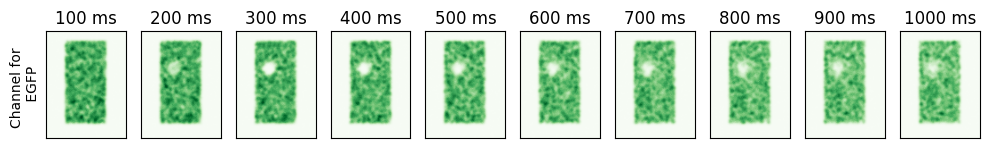

In [23]:
import matplotlib.pyplot as plt
import numpy as np
print(frames.shape)
num_channels = frames.shape[0]
time_frames = frames.shape[1]
channel_colors = ['Greens']
channel_fluorophores = ['EGFP']
fig, axes = plt.subplots(num_channels, time_frames, figsize=(10, 6))
# normalization from the first frame
norm_frames_maxg = [np.max(frames[i, 0,:]) for i in range(num_channels)]
norm_frames_ming = [np.min(frames[i, 0,:]) for i in range(num_channels)]


i = 0
for j in range(time_frames):
    axes[j].imshow(frames[i, j][35:-35, 40:-60], cmap=channel_colors[i], vmin=norm_frames_ming[i], vmax=norm_frames_maxg[i])
    axes[j].set_title(f'{(j+1)*100} ms')
    axes[j].set_xticks([])
    axes[j].set_yticks([])
axes[0].set_ylabel(f'Channel for \n {channel_fluorophores[i]}')
plt.tight_layout()
plt.show()


## Analysis of the intensity in the bleach area

In [24]:
# find the pixel location of the bleaching laser
pixel_size = vm.camera.pixel_size
x_pixel = int((5-0)/pixel_size)
y_pixel = int((5-0)/pixel_size)
print(x_pixel, y_pixel)
r_pixel = int(0.5/pixel_size)
print(r_pixel)

76 76
7


In [25]:
def get_circle_values(array_2d, center_x, center_y, radius):
    """
    Find values in a 2D array that fall within a circle defined by center point and radius.
    
    Parameters:
    array_2d: 2D numpy array or list of lists
    center_x: x-coordinate of circle center (pixel index)
    center_y: y-coordinate of circle center (pixel index)
    radius: radius of circle in pixels
    
    Returns:
    values: List of values falling within the circle
    coordinates: List of (x,y) coordinates for those values
    """
    if not isinstance(array_2d, np.ndarray):
        array_2d = np.array(array_2d)
    
    height, width = array_2d.shape
    
    # Create a grid of coordinates
    y_indices, x_indices = np.ogrid[:height, :width]
    
    # Calculate distances from center point to each coordinate
    distances = np.sqrt((x_indices - center_x)**2 + (y_indices - center_y)**2)
    
    # Find coordinates where distance is less than or equal to radius
    mask = distances <= radius
    
    # Get values and coordinates within circle
    circle_values = array_2d[mask]
    y_coords, x_coords = np.where(mask)
    
    return circle_values.tolist(), list(zip(x_coords, y_coords))

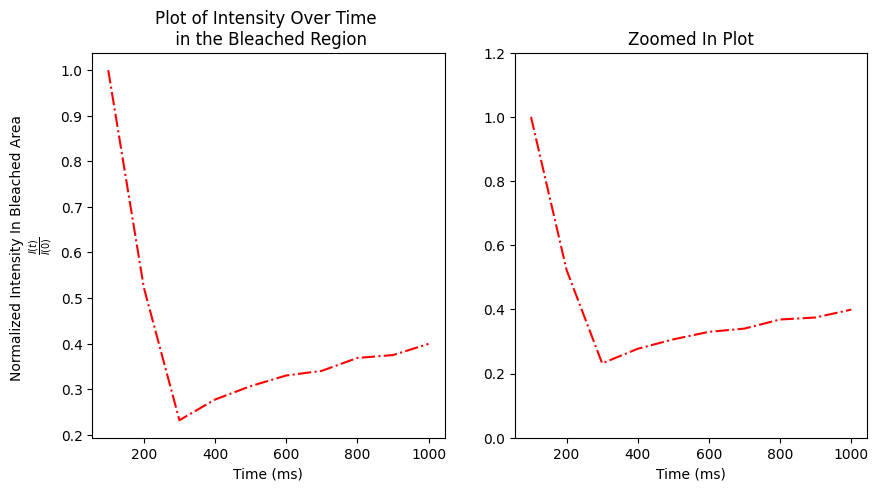

In [26]:
sum_int = np.zeros(time_frames)
time = np.arange(1,time_frames+1)*100
for i in range(time_frames):
    vals, coords = get_circle_values(frames[0][i],x_pixel,y_pixel,r_pixel)
    sum_int[i] = np.sum(vals)
# normalize sum_int to the first val
sum_int = sum_int/sum_int[0]

fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(time, sum_int,'r-.')
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('Normalized Intensity In Bleached Area \n' r'$\frac{I(t)}{I(0)}$')
axes[0].set_title('Plot of Intensity Over Time \n in the Bleached Region')
axes[1].plot(time, sum_int,'r-.')
axes[1].set_ylim(0,1.2)
axes[1].set_xlabel('Time (ms)')
axes[1].set_title('Zoomed In Plot')
plt.show()


In [27]:
# check if file exits 
# import os
# if os.path.isfile(f'FRAP_data_{config_list.MoleculeParameters.diffusion_coefficient}.txt'):
#     print("File exists")
# else:
#     np.savetxt(f'FRAP_data_{config_list.MoleculeParameters.diffusion_coefficient}.txt', sum_int)

In [28]:
# base decay rate
# if os.path.isfile(f'FRAP_base_{config_list.MoleculeParameters.diffusion_coefficient}.txt'):
#     print("File exists")
# else:
#     np.savetxt(f'FRAP_base_{config_list.MoleculeParameters.diffusion_coefficient}.txt', sum_int)

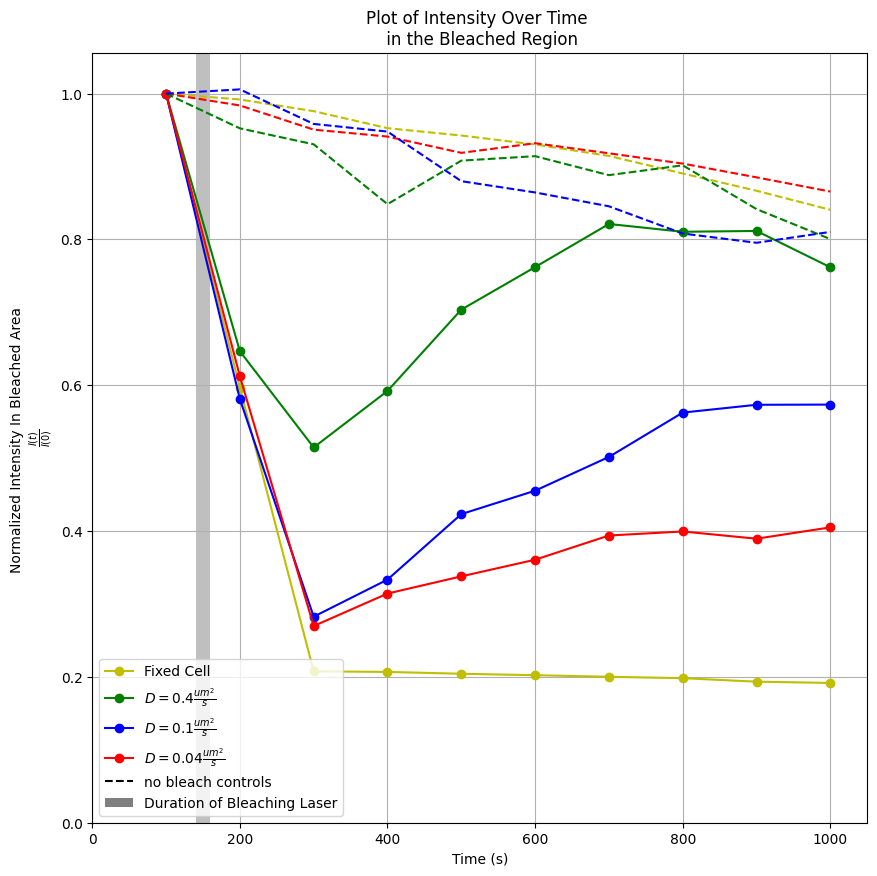

In [ ]:
# import all the data.
time_arr = time
base_004 = np.loadtxt("FRAP_base_[[0.04 0.04]].txt")
base_04 = np.loadtxt("FRAP_base_[[0.4 0.4]].txt")
base_01 = np.loadtxt("FRAP_base_[[0.1 0.1]].txt")

data_004 = np.loadtxt("FRAP_data_[[0.04 0.04]].txt")
data_04 = np.loadtxt("FRAP_data_[[0.4 0.4]].txt")
data_01 = np.loadtxt("FRAP_data_[[0.1 0.1]].txt")

# fixed 
fixed_base_0 = np.loadtxt("FRAP_base_[[0. 0.]].txt")
fixed_data_0 = np.loadtxt("FRAP_data_[[0. 0.]].txt")

fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(time_arr,fixed_data_0, 'y-o',label='Fixed Cell')
ax.plot(time_arr,fixed_base_0, 'y--')

ax.plot(time_arr,data_04, 'g-o',label=r'$D = 0.4 \frac{um^{2}}{s}$')
ax.plot(time_arr,data_01, 'b-o',label=r'$D = 0.1 \frac{um^{2}}{s}$')
ax.plot(time_arr,data_004,'r-o',label=r'$D = 0.04 \frac{um^{2}}{s}$')

ax.plot(time_arr,base_004, 'r--')
ax.plot(time_arr,base_04, 'g--')
ax.plot(time_arr,base_01, 'b--')
ax.plot([],[],'k--',label = "no bleach controls")
ax.set_xlabel("Time (ms)")
ax.set_ylabel('Normalized Intensity In Bleached Area \n' r'$\frac{I(t)}{I(0)}$')
ax.set_title('Plot of Intensity Over Time \n in the Bleached Region')
ax.bar(0,0,color='k',alpha=0.5,label = "Duration of Bleaching Laser")
ax.legend()

# make a shaded box from 140-160 ms which specifies the time over which the bleaching laser is on
ax.axvspan(140,160, facecolor='gray', alpha=0.5)
ax.grid()
ax.set_xlim(0)
plt.show()

